In [2]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

## Pair Programming Intro Machine Learning




Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. 


Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. 

De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.


Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


# Objetivos
Los objetivos de hoy son:


1.
Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. 

Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.




2.
Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.
Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [3]:
df = pd.read_csv('../datos/sephora_website_dataset.csv')

## EDA

Primero de todo estandarizamos el formato del nombre de las columnas

In [5]:
nuevas_columnas = {col: col.replace(" ", "_").lower() for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [6]:
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0


Usando el método shape() vemos el número de filas y de columnas

In [7]:
df.shape

(9168, 21)

Con info vemos lo anterior y la información que contiene el dataframe

In [8]:
df.info

<bound method DataFrame.info of            id               brand            category  \
0     2218774      Acqua Di Parma           Fragrance   
1     2044816      Acqua Di Parma             Cologne   
2     1417567      Acqua Di Parma             Perfume   
3     1417617      Acqua Di Parma             Perfume   
4     2218766      Acqua Di Parma           Fragrance   
...       ...                 ...                 ...   
9163  2208502  SEPHORA COLLECTION          Face Masks   
9164  2298909  SEPHORA COLLECTION            Lip Sets   
9165  2236750  SEPHORA COLLECTION  Tinted Moisturizer   
9166       50  SEPHORA COLLECTION         no category   
9167      304  SEPHORA COLLECTION         no category   

                                            name              size  rating  \
0                 Blu Mediterraneo MINIATURE Set    5 x 0.16oz/5mL     4.0   
1                                        Colonia     0.7 oz/ 20 mL     4.5   
2                               Arancia di Capri 

Vemos el total de nulos con isnull().sum()

In [9]:
df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
url                       0
marketingflags            0
marketingflags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

Visualizamos las columnas con .columns()

In [10]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'url',
       'marketingflags', 'marketingflags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

Usando el método .describe() podemos ver las estadísticas descriptivas de las columnas numéricas

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9168.0,1.962952e+06,385971.360901,50.0,1819453.0,2072353.5,2230591.0,2359685.0
rating,9168.0,3.990020e+00,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,2.821392e+02,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,1.627859e+04,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,5.006324e+01,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,5.182359e+01,49.459020,2.0,25.0,35.0,60.0,549.0
online_only,9168.0,2.348386e-01,0.423921,0.0,0.0,0.0,0.0,1.0
exclusive,9168.0,2.647251e-01,0.441211,0.0,0.0,0.0,1.0,1.0
limited_edition,9168.0,9.184119e-02,0.288817,0.0,0.0,0.0,0.0,1.0
limited_time_offer,9168.0,3.272251e-04,0.018087,0.0,0.0,0.0,0.0,1.0


Miramos los estadísticos descriptivos de las columnas categóricas

In [12]:
df.describe( include = 'object').T

,count,unique,top,freq
brand,9168,324,SEPHORA COLLECTION,496
category,9168,143,Perfume,665
name,9168,9106,Blush,4
size,9168,1623,no size,3161
url,9168,9168,https://www.sephora.com/product/blu-mediterran...,1
marketingflags_content,9168,10,0,4786
options,9168,564,no options,8377
details,9168,8839,no details,14
how_to_use,9168,6497,no instructions,1573
ingredients,9168,6962,unknown,1630


Buscamos duplicados

In [13]:
df.duplicated().sum()

0

Seleccionamos las variables numéricas y las almacenamos en la variable v_numericas

In [14]:
v_numericas = df.select_dtypes(include= ['int64', 'float64'] )

In [15]:
v_numericas

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0
2,1417567,4.5,26,2600,180.0,180.0,1,0,0,0
3,1417617,4.5,23,2900,120.0,120.0,1,0,0,0
4,2218766,3.5,2,943,72.0,80.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9163,2208502,2.0,15,6200,6.0,6.0,0,1,1,0
9164,2298909,0.0,0,266,15.0,27.0,0,1,0,0
9165,2236750,0.0,0,445,16.0,16.0,0,1,0,0
9166,50,5.0,46,0,50.0,50.0,0,0,0,0


Creamos un nuevo dataframe para las columnas realmente numéricas - también podríamos haber usado el método drop()

In [17]:
df_numericas = v_numericas[['rating', 'number_of_reviews', 'love', 'price', 'value_price']]

In [18]:
df_numericas

,rating,number_of_reviews,love,price,value_price
0,4.0,4,3002,66.0,75.0
1,4.5,76,2700,66.0,66.0
2,4.5,26,2600,180.0,180.0
3,4.5,23,2900,120.0,120.0
4,3.5,2,943,72.0,80.0
...,...,...,...,...,...
9163,2.0,15,6200,6.0,6.0
9164,0.0,0,266,15.0,27.0
9165,0.0,0,445,16.0,16.0
9166,5.0,46,0,50.0,50.0


Exploramos los outliers de forma visual usando boxplots

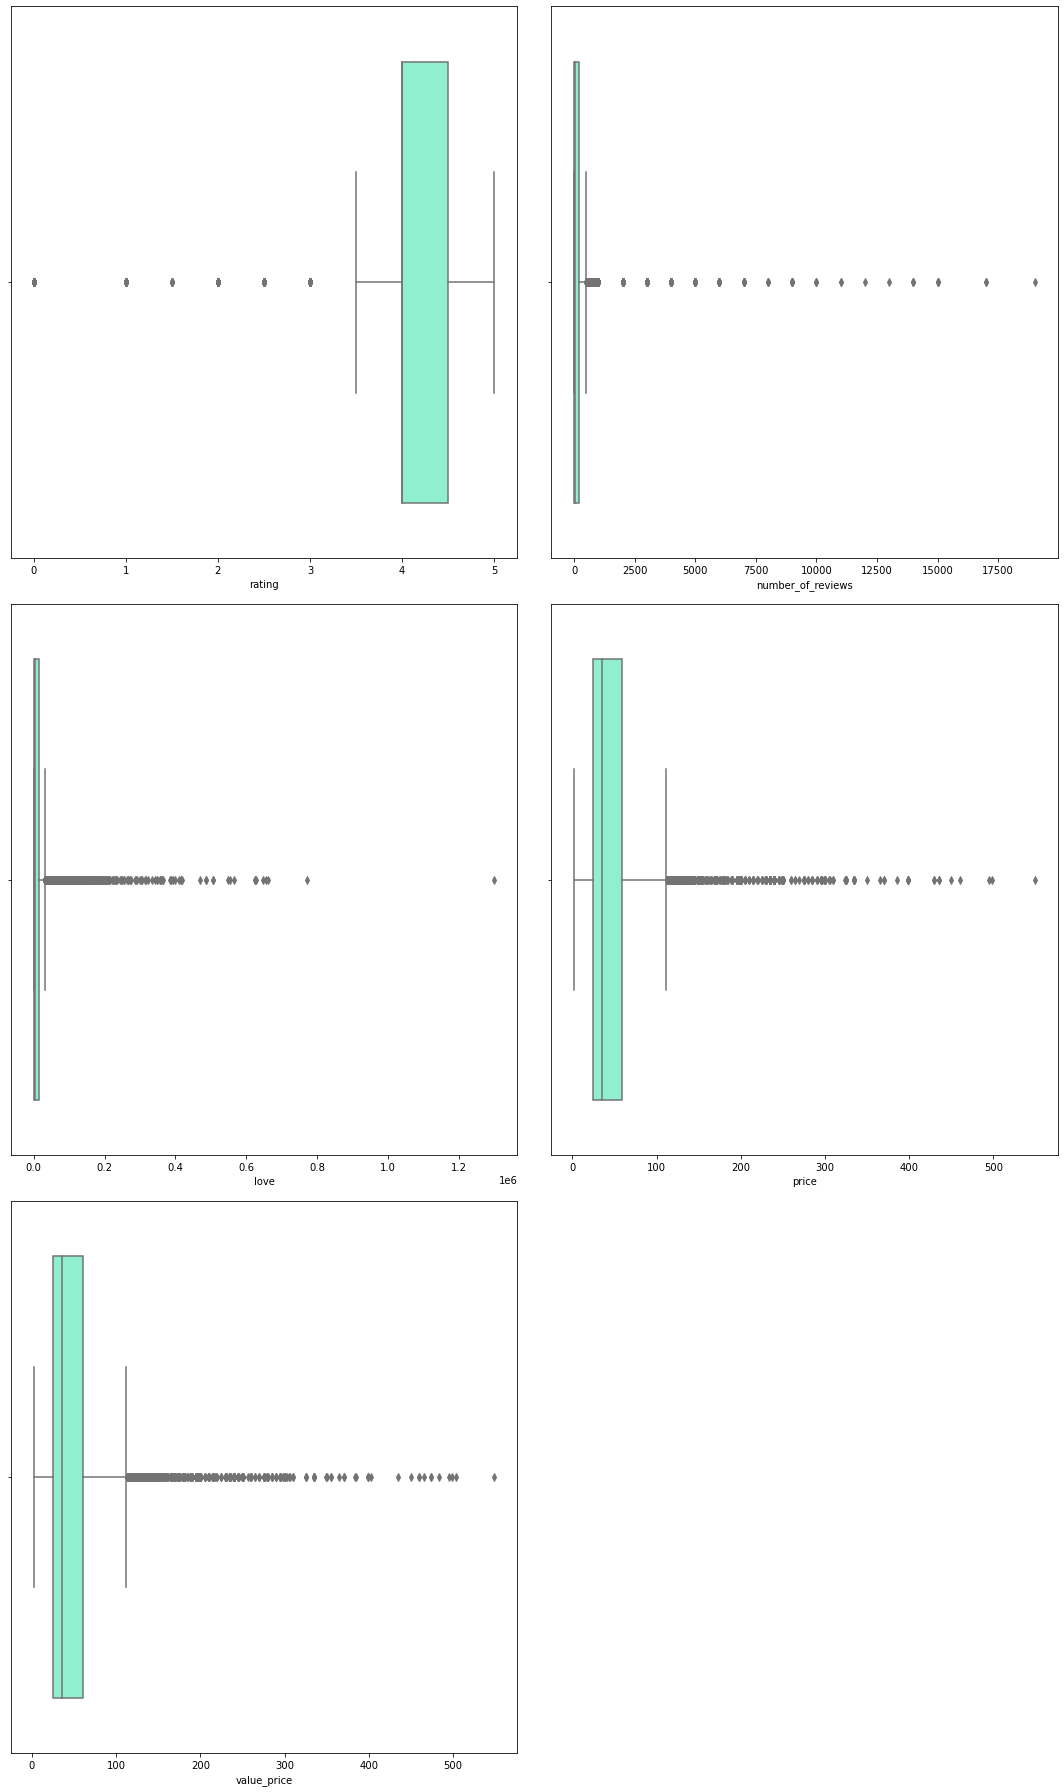

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [19]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
        

    
    return dicc_indices 

In [25]:
lista_numericas = list(df_numericas.columns)

In [27]:
ind = detectar_outliers(lista_numericas, df_numericas)

In [23]:
ind.keys()

dict_keys(['rating', 'number_of_reviews', 'love', 'price', 'value_price'])

Sacamos los outliers de las numéricas

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9168.0,1.962952e+06,385971.360901,50.0,1819453.0,2072353.5,2230591.0,2359685.0
rating,9168.0,3.990020e+00,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,2.821392e+02,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,1.627859e+04,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,5.006324e+01,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,5.182359e+01,49.459020,2.0,25.0,35.0,60.0,549.0
online_only,9168.0,2.348386e-01,0.423921,0.0,0.0,0.0,0.0,1.0
exclusive,9168.0,2.647251e-01,0.441211,0.0,0.0,0.0,1.0,1.0
limited_edition,9168.0,9.184119e-02,0.288817,0.0,0.0,0.0,0.0,1.0
limited_time_offer,9168.0,3.272251e-04,0.018087,0.0,0.0,0.0,0.0,1.0


In [28]:
for k, v in ind.items():
    median = df_numericas[k].median()
    for i in v:
        df.loc[i,k] = median 

In [29]:
df_numericas.head()

,rating,number_of_reviews,love,price,value_price
0,4.0,4,3002,66.0,75.0
1,4.5,76,2700,66.0,66.0
2,4.5,26,2600,180.0,180.0
3,4.5,23,2900,120.0,120.0
4,3.5,2,943,72.0,80.0


## Variable respuesta/dependiente

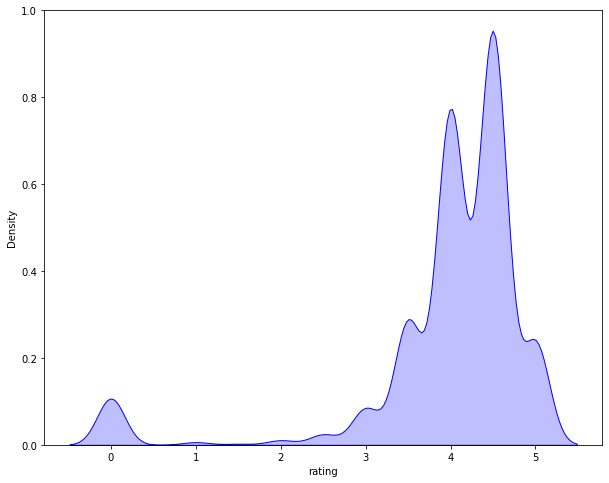

In [30]:

sns.distplot(
    df_numericas["rating"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

## Variables predictorias/independientes

In [31]:
df_numericas.select_dtypes(include = np.number).describe().T


,count,mean,std,min,25%,50%,75%,max
rating,9168.0,3.990020,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,282.139180,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,16278.585079,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,50.063237,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,51.823590,49.459020,2.0,25.0,35.0,60.0,549.0


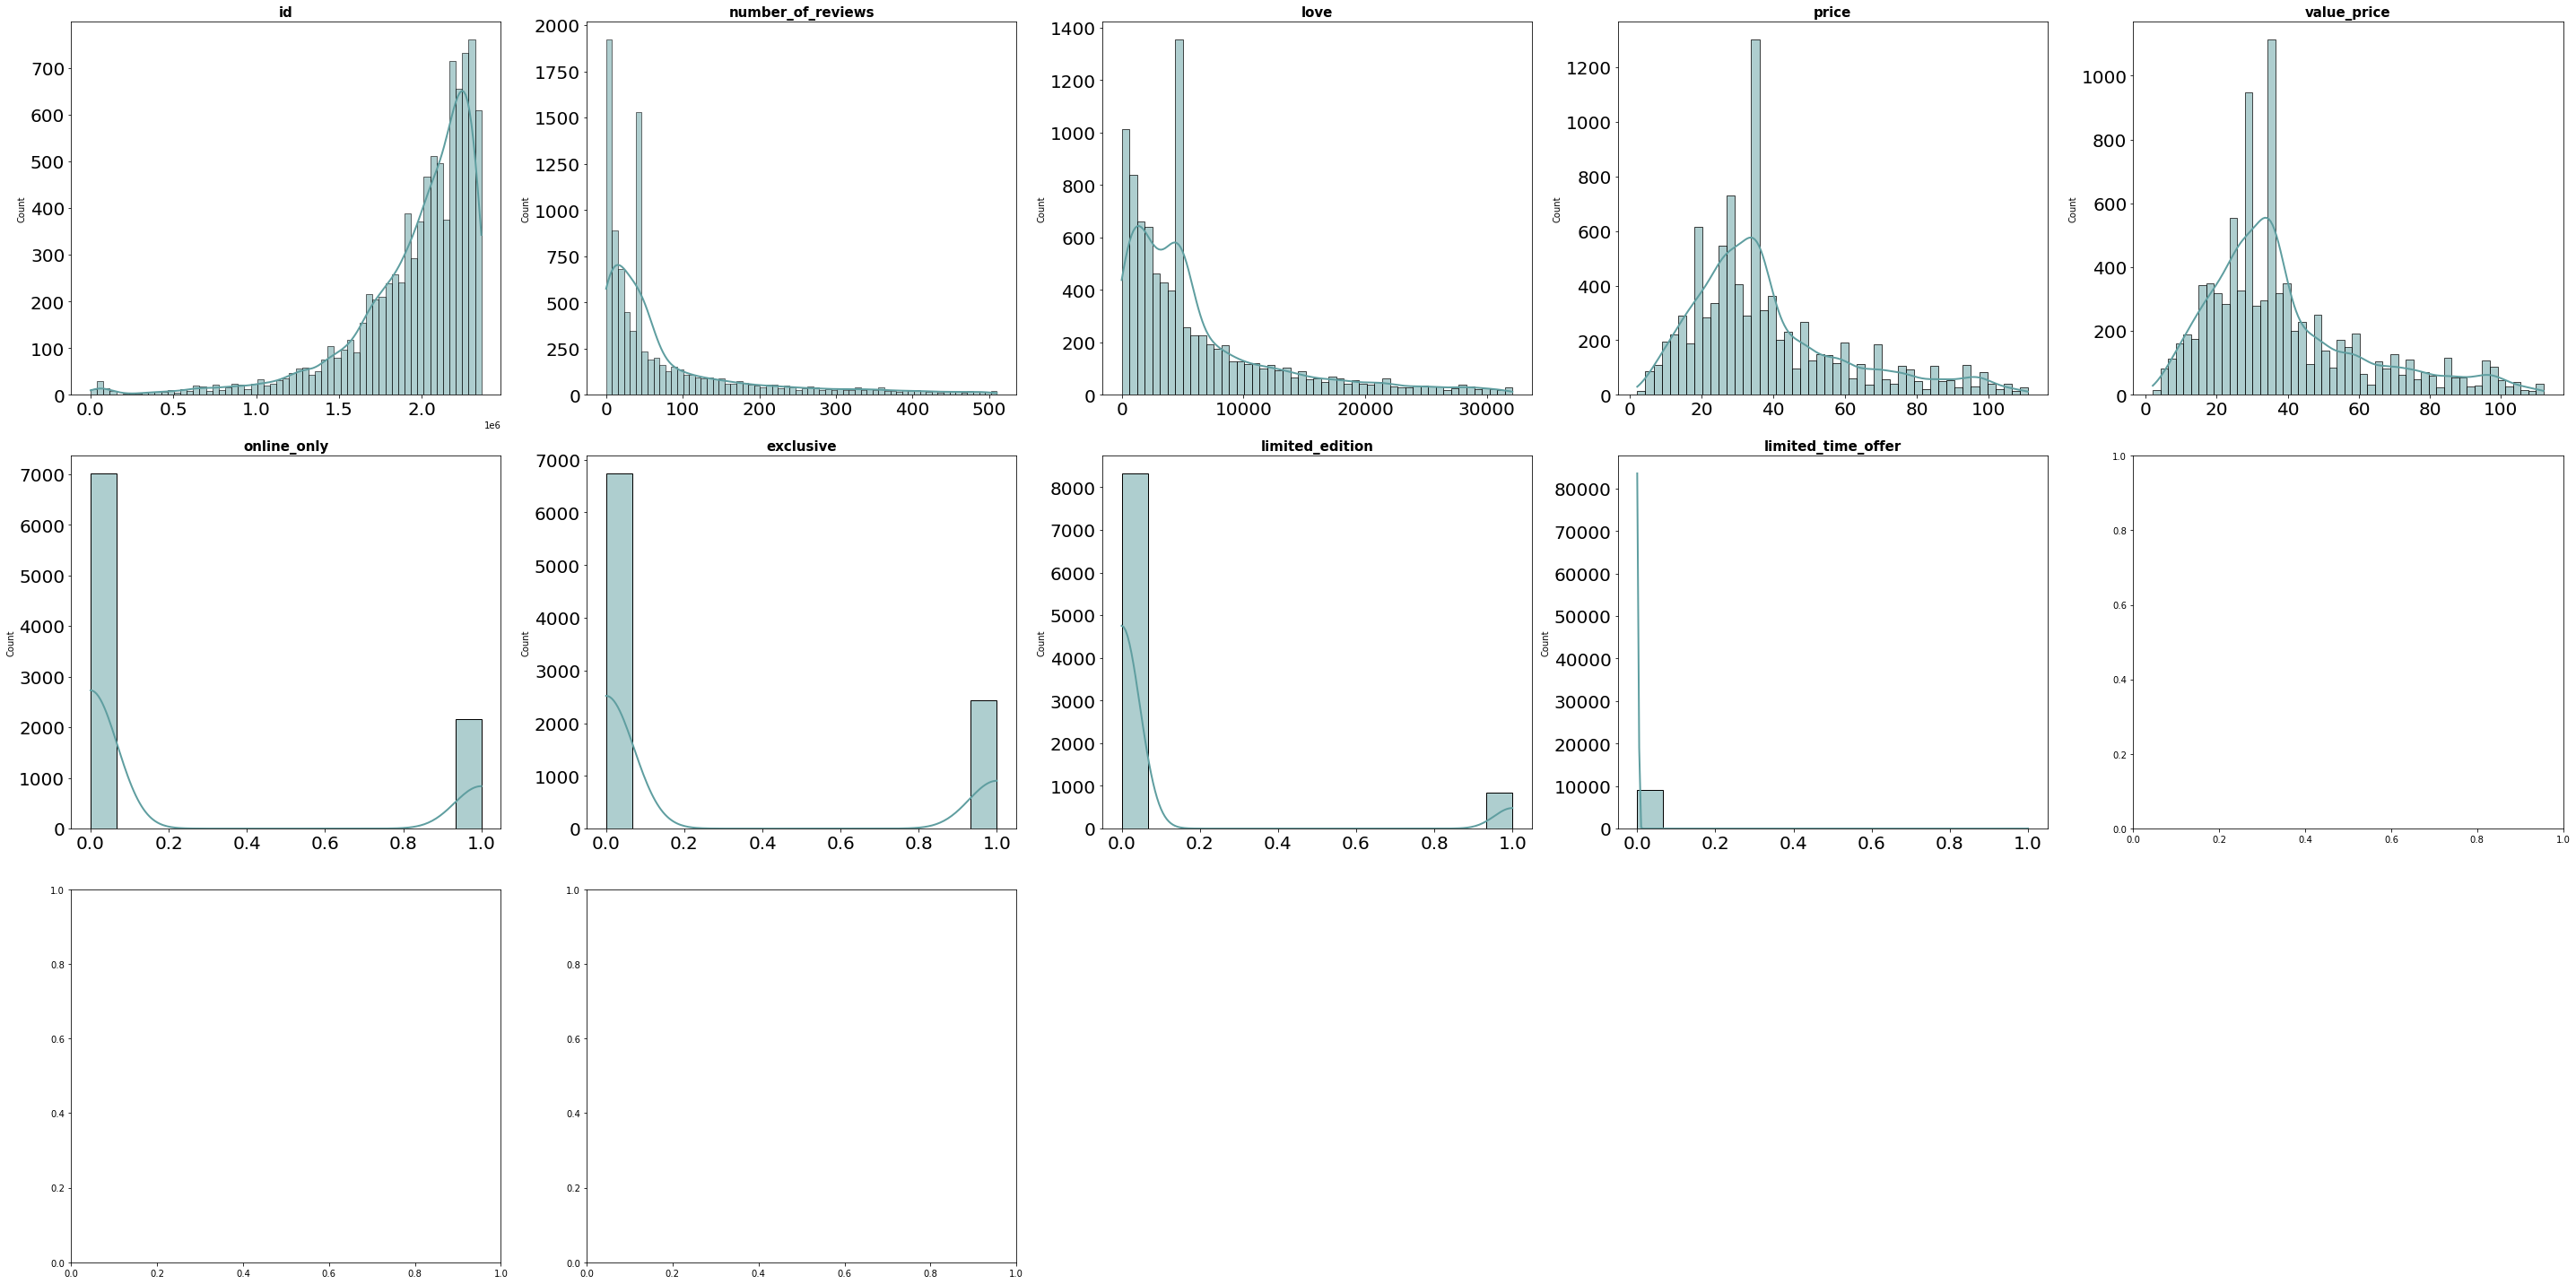

In [33]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("rating")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "cadetblue", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

    


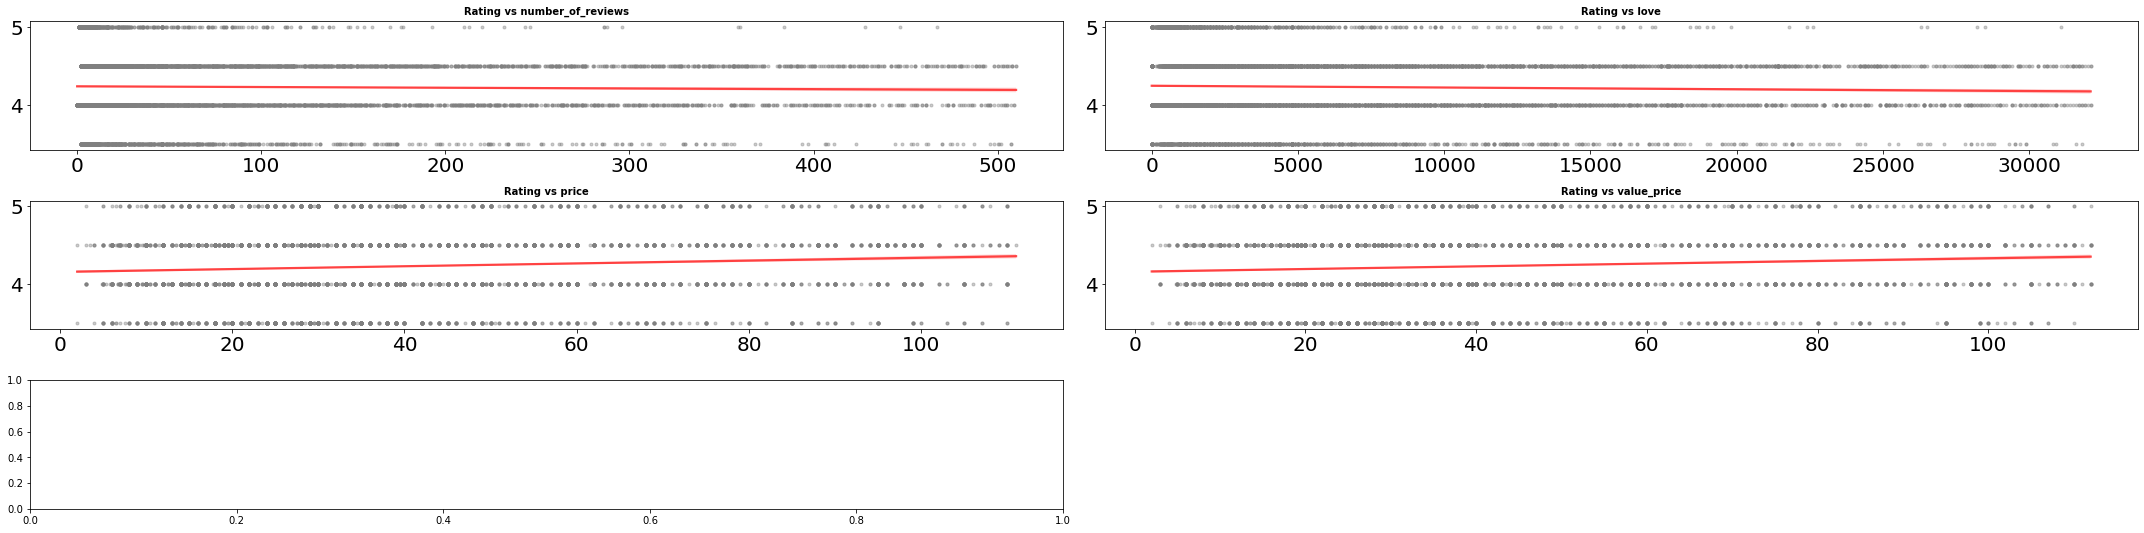

In [ ]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df_numericas.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("rating")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["rating"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Rating vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

Usando un heatmap vemos la correlación entre variables numéricas

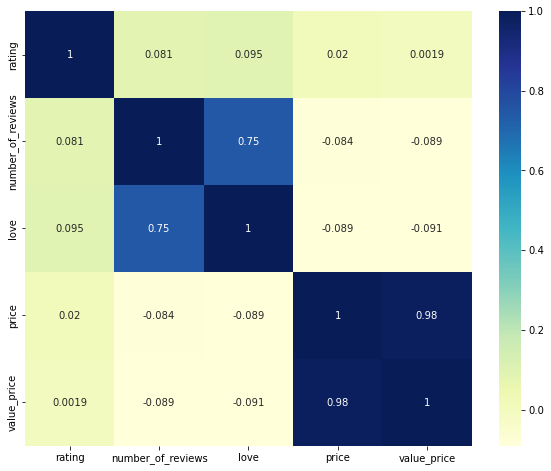

In [20]:
df_numericas2 = df_numericas.select_dtypes(include = np.number)
sns.heatmap(df_numericas2.corr(), 
           cmap = "YlGnBu", 
           annot = True);

La mayor correlación es entre price y value_price, y entre number_of_reviews y love.

El resto de correlaciones son muy bajas.

## Variables categóricas

Tenemos varias variables categóricas pero al ser descripciones de los productos o nombres de los mismos decidimos obviarlas.

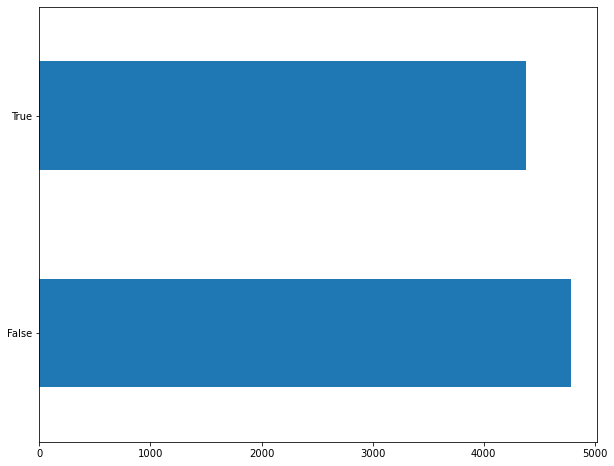

In [ ]:
df['MarketingFlags'].value_counts().plot.barh();

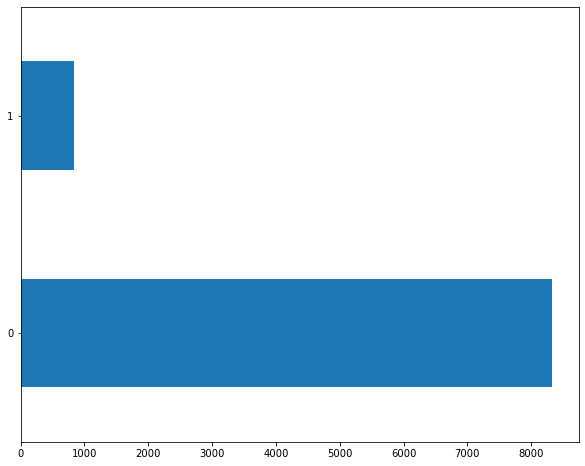

In [ ]:
df['limited_edition'].value_counts().plot.barh();

In [ ]:
df.head(3)

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
id,,,,,,,,,,,,,,,,,,,,
2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,35.0,35.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0


Guardamos el dataset

In [22]:
df.to_csv("../datos/sephora_website_dataset.csv")